
### Analysis of LFADS input timing 

This is an examination of when LFADS controller outputs occur. As shown below, the inputs are sparse in time, and so the goal is to determine when the sharp peaks occur

TODO: measures of sparsity of the inputs

As is evident from the plots, peaks in the controller outputs tend to occur immediately after target appearances. The following is a distribution of latencies between taret appearances and the next peak, for peaks which occur within 500ms of a target appearance. I'll use a range of thresholds for peak appearances.

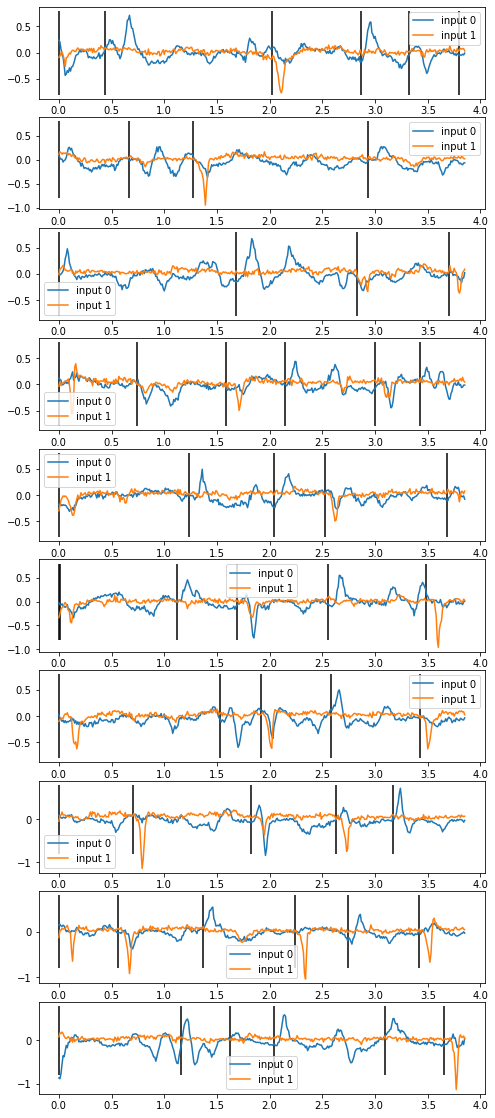

In [6]:
from scipy.io import loadmat
import sys
import h5py
sys.path.insert(0, '/home/pmalonis/lfads_analysis/src')
import utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

trial_type = 'all'

sparse_filename = "/home/pmalonis/226_figs/rockstar_8QTVEk_%s.h5"%trial_type
data_filename = "/home/pmalonis/lfads_analysis/data/intermediate/rockstar.p"
inputInfo_filename = "/home/pmalonis/lfads_analysis/data/model_output/rockstar_inputInfo.mat"

input_info = loadmat(inputInfo_filename)
used_inds = utils.get_indices(input_info, trial_type)

df = pd.read_pickle(data_filename)
ntrials = 10

with h5py.File(sparse_filename) as h5file:
    trial_len_ms = input_info['seq_timeVector'][-1][-1]
    dt = np.round(trial_len_ms/h5file['controller_outputs'].shape[1])/1000 
    trial_len = trial_len_ms/1000
    trial_len = np.floor(trial_len/dt)*dt
    lfads_t = np.arange(0, trial_len, dt)
    plt.figure(figsize=(8,20))
    for i, trial_idx in enumerate(used_inds[:ntrials]):
        plt.subplot(ntrials, 1, i + 1)
        n_inputs = h5file['controller_outputs'].shape[2]
        targets = df.loc[trial_idx].kinematic.loc[:trial_len].query('hit_target').index.values
        plt.vlines(targets, -.8,.8)
        legend = []
        for input_idx in range(n_inputs):
            plt.plot(lfads_t, h5file['controller_outputs'][i,:,input_idx])
            legend.append('input %d'%input_idx)

        plt.legend(legend)

In [9]:
import sys
sys.path.insert(0, '/home/pmalonis/lfads_analysis/src')
import timing_analysis as ta
import segment_submovements as ss
import seaborn as sns
from scipy import io
import utils
import importlib
import pandas as pd
import h5py
import utils
importlib.reload(ta)
importlib.reload(ss)
importlib.reload(utils)

trial_type = 'all'
lfads_filename = "/home/pmalonis/lfads_analysis/data/model_output/rockstar_8QTVEk_%s.h5"%trial_type
data_filename = "/home/pmalonis/lfads_analysis/data/intermediate/rockstar.p"
inputInfo_filename = "/home/pmalonis/lfads_analysis/data/model_output/rockstar_inputInfo.mat"

#limits of window to look for peaks after target appearance
win_start = 0
win_stop = 0.5
# minimum distance between peaks
min_distance = 5

df = pd.read_pickle(data_filename)
input_info = io.loadmat(inputInfo_filename)
with h5py.File(lfads_filename) as h5file:
    co = h5file['controller_outputs'].value
    dt = utils.get_dt(h5file, input_info)
    trial_len = utils.get_trial_len(h5file, input_info)
    n_inputs = h5file['controller_outputs'].shape[2]

peak_thresholds = [.1, .2, .3, .4]
peak_dfs = []
for peak_thresh in peak_thresholds:
    targets = ta.get_targets(df)
    peaks = ta.get_peaks(co, dt, peak_thresh, min_distance)
    target_peaks, peak_counts = ta.get_latencies(targets, peaks, win_start, win_stop, trial_len=trial_len)
    peak_dfs.append(target_peaks)

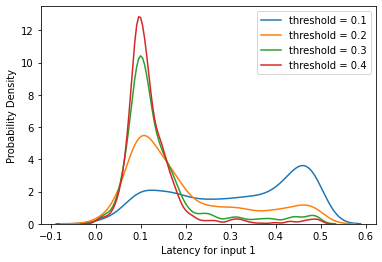

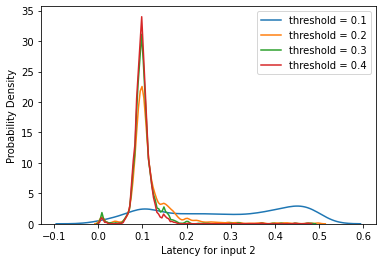

In [40]:
for i in range(n_inputs):
    plt.figure()
    for j, p in enumerate(peak_thresholds):
        label = 'threshold = %0.1f'%p
        sns.distplot(peak_dfs[j]['latency_%d'%i], 
                     hist=False, label=label)

    plt.legend()
    plt.xlabel('Latency for input %d'%(i+1))
    plt.ylabel('Probability Density')


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fdd7965b9b0&gt;

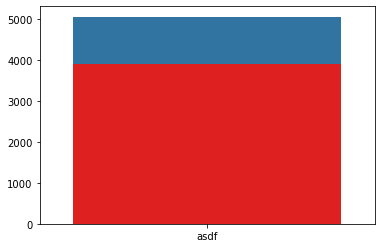

In [64]:
from importlib import reload
reload(ta)
total_targets = targets.shape[0]
inputs = list(range(n_inputs))
targets_with_peak = [ta.get_target_peak_counts(target_peaks, input_idx) for input_idx in inputs]
targets_any = ta.get_target_peak_counts(target_peaks, inputs, all_inputs=False)
targets_all = ta.get_target_peak_counts(target_peaks, inputs, all_inputs=True)

sns.barplot(x=['asdf'], y=total_targets)
sns.barplot(x=['asdf'], y=targets_with_peak[0],color='red')

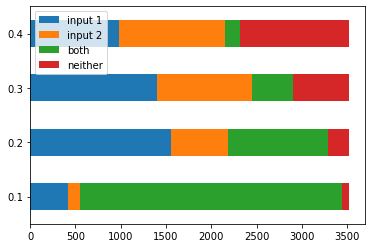

In [16]:
import matplotlib
bardf=pd.DataFrame({'input 1':[(peak_dfs[i].latency_0.notnull() & peak_dfs[i].latency_1.isnull()).sum() for i in range(len(peak_dfs))],
'input 2':[(peak_dfs[i].latency_1.notnull() & peak_dfs[i].latency_0.isnull()).sum() for i in range(len(peak_dfs))],
'both':[(peak_dfs[i].latency_1.notnull() & peak_dfs[i].latency_0.notnull()).sum() for i in range(len(peak_dfs))],
'neither':[(peak_dfs[i].latency_1.isnull() & peak_dfs[i].latency_0.isnull()).sum() for i in range(len(peak_dfs))]},
index=peak_thresholds)


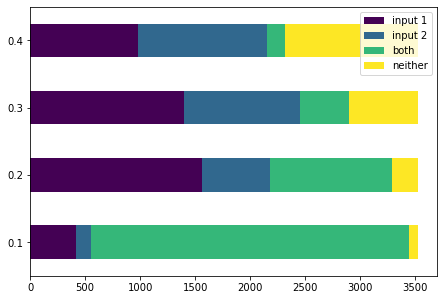

In [36]:

cmap = matplotlib.cm.get_cmap('viridis')
rgba = cmap(np.linspace(0,1,len(peak_thresholds)))
ax = bardf.plot.barh(stacked=True, color=rgba)
fig = ax.get_figure()


In [37]:
def get_directions(pkdf)
    x = pkdf.target_x-pkdf.x
    y = pkdf.target_y-pkdf.y
    np.

best_threshold = 0.3
i = peak_thresholds.index(best_threshold) #index of best threshold
peak_dfs[i]

x          y       x_vel       y_vel  hit_target  \
trial time                                                                 
0     0.001733 -42.817694 -14.944022  191.132483   81.668965        True   
      0.435700   7.757149  26.060971  -10.693576  284.129698        True   
      2.017667 -53.302574 -18.784072  -27.791387  -10.334948        True   
      2.867633  59.678349  -1.600768   40.116882  -37.459507        True   
      3.323633  -1.607100 -22.363880 -263.164906 -211.635474        True   
...                   ...        ...         ...         ...         ...   
712   0.751733  -4.335852 -46.318880   40.194573  110.633257        True   
      1.179700   6.073481  14.981520   87.259983  212.827523        True   
      1.683700  56.536800  43.405988  217.553065   21.814378        True   
      2.635667 -17.817842 -31.290434   24.729613   78.237994        True   
      3.023667   4.262842 -40.341814   64.469695  -55.189856        True   

                 target_x   target_y  latency_0  latency_1  
trial time                                                  
0     0.001733   7.757149  26.060971   0.058267        NaN  
      0.435700 -53.302574 -18.784072   0.234300        NaN  
      2.017667  59.678349  -1.600768        NaN   0.092333  
      2.867633  -1.607100 -22.363880   0.092367        NaN  
      3.323633 -14.638588   0.396804   0.166367        NaN  
...                   ...        ...        ...        ...  
712   0.751733   6.073481  14.981520   0.118267        NaN  
      1.179700  56.536800  43.405988   0.100300   0.100300  
      1.683700 -17.817842 -31.290434   0.066300        NaN  
      2.635667   4.262842 -40.341814        NaN        NaN  
      3.023667 -30.277757  56.693011   0.096333   0.096333  

[3522 rows x 9 columns]

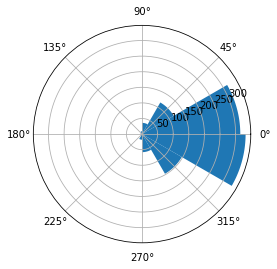

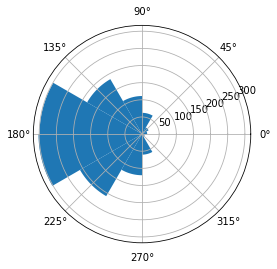

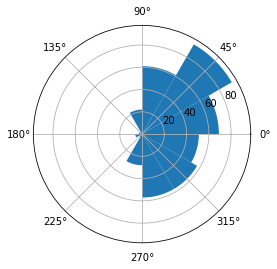

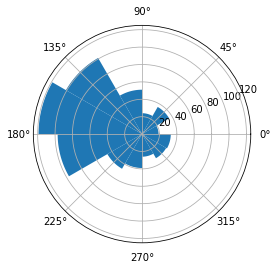

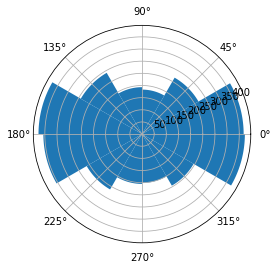

In [56]:
pkdf = peak_dfs[2]
x = pkdf.target_x-pkdf.x
y = pkdf.target_y-pkdf.y
theta=np.arctan2(y, x)[pkdf.latency_1.notnull() & pkdf.latency_0.isnull()].values
utils.polar_hist(theta, 12)
plt.figure()
theta=np.arctan2(y, x)[pkdf.latency_0.notnull() & pkdf.latency_1.isnull()].values
utils.polar_hist(theta, 12)
plt.figure()
theta=np.arctan2(y, x)[pkdf.latency_0.notnull() & pkdf.latency_1.notnull()].values
utils.polar_hist(theta, 12)
theta=np.arctan2(y, x)[pkdf.latency_0.isnull() & pkdf.latency_1.isnull()].values
plt.figure()
utils.polar_hist(theta, 12)
theta=np.arctan2(y, x)
plt.figure()
utils.polar_hist(theta, 12)

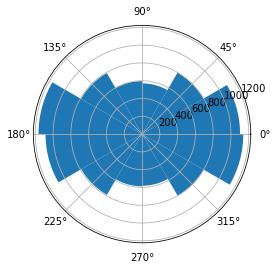

In [60]:
minx = np.min(peak_dfs[2].target_x.values)
maxx = np.max(peak_dfs[2].target_x.values)
miny = np.min(peak_dfs[2].target_y.values)
maxy = np.max(peak_dfs[2].target_y.values)

x = np.diff(np.random.rand(2,10000)*(maxx-minx) + minx, axis=0)
y = np.diff(np.random.rand(2,10000)*(maxy-miny) + miny, axis=0)

theta = np.arctan2(y,x)
utils.polar_hist(theta, 12)